<a href="https://colab.research.google.com/github/davis689/binder/blob/master/kinetics_numerical_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Numerical Integration of first order rate laws


##First order

We want to numerically integrate the rate laws for the first order equilibrium, A->B. First we define a function to describe our rate equations. 

In [2]:
def rxn1st(M,t,k1):
   
  r1=k1*M[0] #k1*(concentation of A) 
  
  dAdt=-r1 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1 #rate of change of B increased by forward reaction and decreased by reverse reaction
  
  return(dAdt,dBdt)

Here we have defined a function, rxn, that returns the derivatives of A and B as given by the rate laws. This is necessary for the differential equation solver. In addition we need to set up a few variables like the times we want to evaluate, the initial concentrations, and the rate constants.

Here, for no particular reason, we assign $M_0$ as the vector containing the initial concentrations [A]<sub>0</sub> and [B]<sub>0</sub> and assign them values of 1 and 0, respectively.

Then call the Ordinary Differential Equation INTegrator function (odeint) using the rxn1st function we defined above, the initial concentration vector (M0), the times we want to evaluate (t), and the rate constants.

In [20]:
t=np.linspace(0,10,101) # define t. The first number is the beginning point, the second number is the end, and the third is the number of points.
M0=[1,0] #initial concentrations of A and B
k1=1 # the one rate constant
C=odeint(rxn1st,M0,t,args=(k1,)) # solve the DEs. Not sure why the last , is necessary but it seems to work with it there.

After solving, the result is stored in C, one column of numbers for each species in the reaction. Here we can separate it out by getting all of the first column (column 0) and assigning it to cA and all of column 1 and assigning it to cB.

In [21]:
cA=C[:,0] #define cA to give the concentration from the first (zeroth) column of the C array
cB=C[:,1] #define cB to give the concentration from the second column of the C array

In [ ]:
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()
plt.show()

See what would change if you make $k=10$ or $k=0.1$. \\
See what would change if you make $[A]_o=0.5$ or $[B]_o=0.5$.


Of course we can analytically solve the first order rate law quite easily without a computer. We can fix up our function to cover more complex cases by including the backward reaction. For now we'll assume first order in both directions.

In [ ]:
def rxn1st_equilibrium(M,t,k1,k2):
   
  r1=k1*M[0] #k1*(concentation of A)
  r2=k2*M[1]
  
  dAdt=-r1+r2 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1-r2 #rate of change of B increased by forward reaction and decreased by reverse reaction
  
  return(dAdt,dBdt)

Combining the setup concentrations, rate constants, solving the set of differential equations, and plotting...

In [ ]:
t=np.linspace(0,10,100)

M0=[1,0] #A0 and B0
k1=1 #fwd reaction
k2=0 #bkwd reaction

C=odeint(rxn1st_equilibrium,M0,t,(k1,k2))
cA=C[:,0] 
cB=C[:,1]
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()
plt.show()

Using the constants and initial concentrations given should give us the same result as we got with only the forward reaction. 

Modify the code below to graph the concentations of A and B if $[A]_o$=1 and $[B]_o=0$ for k<sub>1</sub>=1 and k<sub>2</sub>=.5 \\
How do things change? \\


In [ ]:
t=np.linspace(0,10,100)
M0=[ , ]
k1=
k2= 

C=odeint(rxn1st_equilibrium,M0,t,(k1,k2))
cA=C[:,0]
cB=C[:,1]
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()

What happens if $k_2$ is twice as big as $k_1$?




In [ ]:
t=np.linspace(0,10,100)
M0=[ , ]
k1=
k2=

C=odeint(rxn1st_equilibrium,M0,t,(k1,k2))
cA=C[:,0]
cB=C[:,1]
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,label='B')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()

Try some other values of initial concentrations and rate constants. 


##Second order

Modify the orginal function to calculate second order reactions (both directions). In Python, powers are signified by \*\*, as in 2\**3=8.

In [ ]:
def rxn2nd(M,t,k1,k2):
   
  r1=k1*M[0]**2 
  r2=k2*M[1]**2 
  
  dAdt=-r1+r2 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1-r2 #rate of change of B increased by forward reaction and decreased by reverse reaction
  
  return(dAdt,dBdt)

Plot for $k_1$=1, $k_2$=0, $A_0$=1, and $B_0$=0

Modify rate constants and concentrations and justify the results.

##Three step reactions

Modify to calculate for a reaction like A$\rightleftharpoons$B$\rightarrow$C

Plot for various values of rate constants.


In [ ]:
def rxn(M,t,k1,k2,k3):
   
  r1=k1*M[0] #k1*(concentation of A)
  r2=k2*M[1] #k2*(concentration of B)
  r3=k3*M[1]
  dAdt=-r1+r2 #rate of change of A decreased by forward reaction and increased by reverse reaction
  dBdt=r1-r2-r3 #rate of change of B increased by forward reaction and decreased by reverse reaction
  dCdt=r3
  return(dAdt,dBdt,dCdt)

In [ ]:
t=np.linspace(0,10,100)
M0=[1,0,0]
k1=5
k2=.1 
k3=.1
C=odeint(rxn,M0,t,(k1,k2,k3))
cA=C[:,0]
cB=C[:,1]
cC=C[:,2]
plt.plot(t,cA,'r-',label='A')
plt.plot(t,cB,'b-',label='B')
plt.plot(t,cC,'-',color='purple',label='C')
plt.xlabel('time')
plt.ylabel('conc')
plt.xlim(0,max(t))
plt.ylim(0,1.05*max(cA))
plt.legend()
plt.show()

Change the values of k to see the effect. Try to make changes that cause B to stay very small.

Now let's apply approximations and see when they fit best. 

In [ ]:
B_ss=[]
B_pe=[]
for ca in cA: # cA from above
  B_ss.append(k1/(k2+k3)*ca) # steady state calculation
  B_pe.append(k1/k2*ca) # pre-equilibrium calculation
plt.plot(t,cB,'b-',label='exact solution')
plt.plot(t,B_ss,'r--',label='steady state')
plt.plot(t,B_pe,'g--',label='prior equilibrium')
plt.xlim(0,max(t))
plt.ylim(0,1)
plt.legend()
plt.show()

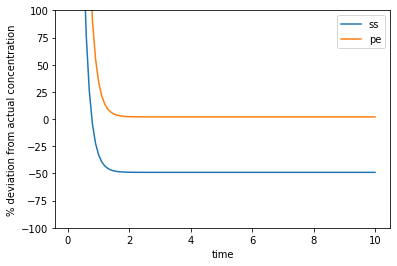

In [ ]:
ratio_ss=[]
ratio_pe=[]
for i in range(1,len(t)): #start at 1 to avoid division by zero
  ratio_ss.append((B_ss[i]-cB[i])/cB[i]*100) #percent difference of approximation
  ratio_pe.append(abs(B_pe[i]-cB[i])/cB[i]*100) #percent difference
plt.plot(t[1:],ratio_ss,label='ss') # use all values of t after the zeroth one.
plt.plot(t[1:],ratio_pe,label='pe')
plt.ylim(-100,100)
plt.legend()
plt.ylabel('% deviation from actual concentration')
plt.xlabel('time')
plt.show()

Try values of k so that the steady state approximation has the lowest absolute error and values of k such that the pre-equilibrium approximation has the lowest absolute error.